In [2]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

from utilities import Mask, Bp2f
import copy 

import seaborn as sea

from scipy.stats.mstats import gmean

%config Completer.use_jedi = False
%matplotlib inline

In [3]:
sea.set_style("white")
sea.set_context("talk")
sea.set_style("ticks")

# basic configuration

In [4]:
nside = 128

In [19]:
masked_index = np.load('/global/cscratch1/sd/jianyao/CBASS/SPASS_masked_index.npy')
mask_spass = np.load('/global/cscratch1/sd/jianyao/CBASS/mask_spass_%s.npy'%nside)

mask_spass_512 = np.load('/global/cscratch1/sd/jianyao/CBASS/mask_spass_512.npy')

In [7]:
masked_index.shape[0]

96145

In [8]:
masked_index.shape[0]/12/nside**2

0.4890187581380208

# statistical properities

In [25]:
print('%02d'%9)

09


In [27]:
N = 50

SN_S = np.zeros((N, 12*nside**2)); 
total_sigma = np.load('/global/cscratch1/sd/jianyao/CBASS/Noise/homo_noise/nside_128/5_fre_sigma_P_%s_uK_RJ.npy'%nside)
for i in range(N):
    total_P = np.load('/global/cscratch1/sd/jianyao/CBASS/Observations/homo_noise/nside_128/totalP_s0_%s_uK_RJ_%03d.npy'%(nside, i))

    SN_S[i] = gmean([(total_P/total_sigma)[0],(total_P/total_sigma)[2],(total_P/total_sigma)[3],(total_P/total_sigma)[4]])
Sn_S = np.mean(SN_S, axis = 0)   

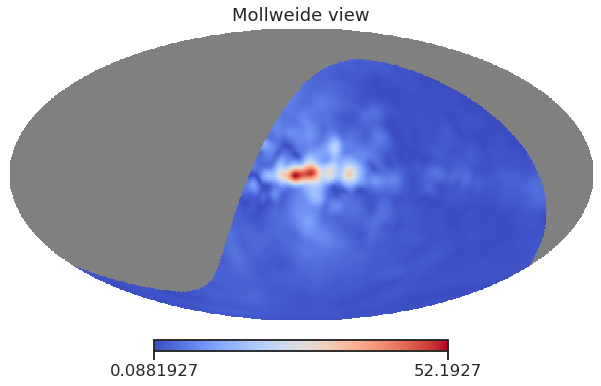

In [50]:
hp.mollview(Mask(Sn_S, mask_spass), cmap = 'coolwarm')

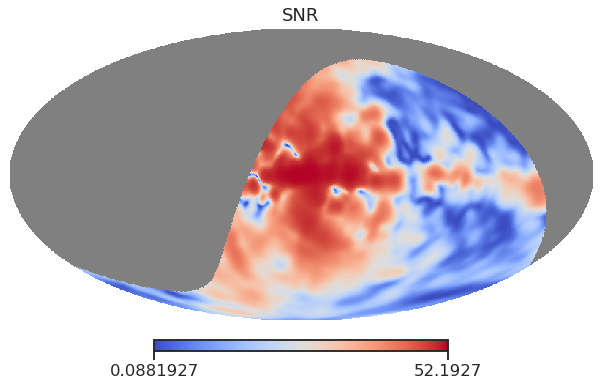

In [117]:
hp.mollview(Mask(Sn_S, mask_spass), cmap = 'coolwarm', norm = 'hist', title = 'SNR')

# different patches of one realization

In [9]:
nodes = 63

In [10]:
high_snr = np.load('/global/cscratch1/sd/jianyao/CBASS/Results/s0_only_homo_noise/nside_128/High_SNR_pixels_3000.npy')

In [11]:
mask_used = np.zeros(12*nside**2); betas = np.zeros(12*nside**2)
for i in range(63):
    betas_i = np.load('/global/cscratch1/sd/jianyao/CBASS/Results/s0_only_homo_noise/nside_128/Dyne_As_betas_SPASS_128_%03d.npy'%i)
    betas[masked_index[1525*i:1525*(i+1)]]= betas_i[2::4]
    
betas[betas==0] = hp.UNSEEN

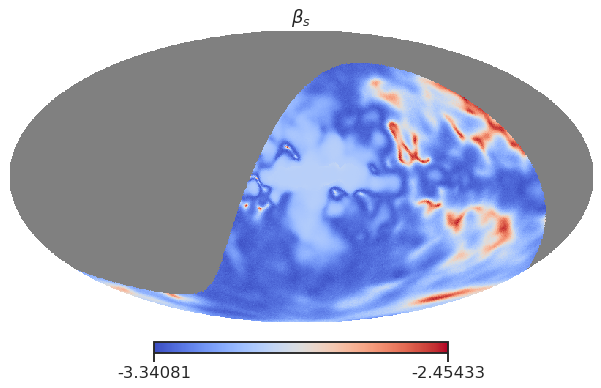

In [23]:
hp.mollview(betas, cmap = 'coolwarm', title = r'$\beta_s$')

In [13]:
template_dir = '/global/project/projectdirs/cmb/www/pysm-data/pysm_2/'
beta_s_pysm = hp.read_map(template_dir+'synch_beta.fits')

In [18]:
hp.get_nside(beta_s_pysm)

512

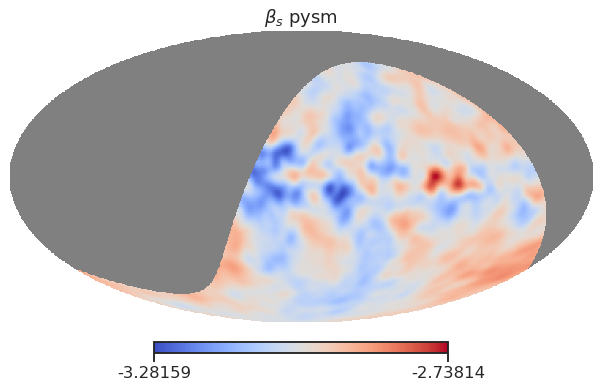

In [20]:
hp.mollview(Mask(beta_s_pysm, mask_spass_512), cmap = 'coolwarm', title = r'$\beta_s$ pysm')

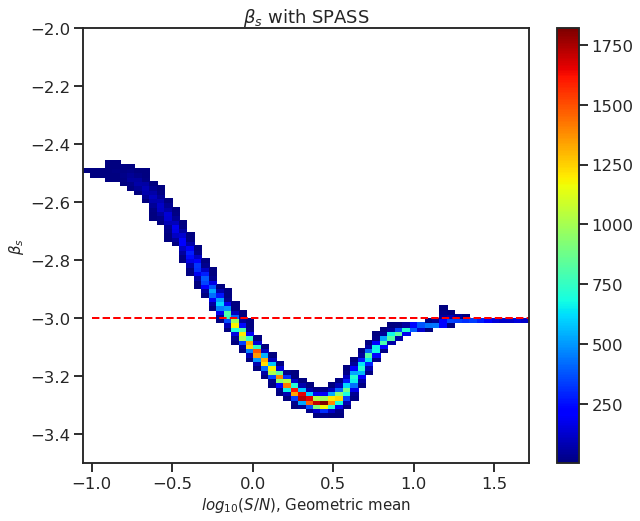

In [115]:
my_cmap = copy.copy(plt.cm.get_cmap("jet"))
my_cmap.set_under('w',0)
plt.figure(figsize = (10,8))
bins = plt.hist2d(np.log10(Sn_S[masked_index[:-70]]), betas[masked_index[:-70]], bins = [60, 60], cmin = 1, cmap = my_cmap)
plt.hlines(-3.0, xmin = -1, xmax = 2, color = 'red', lw = 2, ls = '--')
plt.ylim(-3.5, -2)
plt.xlabel(r'$log_{10}(S/N)$, Geometric mean', fontsize = 15)
plt.ylabel(r'$\beta_s$', fontsize = 15)
plt.title(r'$\beta_s$ with SPASS')
plt.colorbar()